# 1. 构造数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 原函数 y = x0+2x1, x0 = 10
def dataSimulation(x):
    y = 2*x+10
    y = [i+np.random.normal(0, 1) for i in y]
    return np.array(y)
x = np.linspace(-10,10,21)
y = dataSimulation(x)

# 2.构造损失函数cost function

In [3]:
def costFunction(theta,x,y):
    f = np.poly1d(theta) # 构建线性方程
    err = np.sum(np.square(np.array(f(x))-y))/2*len(x)
    return err



# 3.对参数theta进行更新

In [4]:
def updateTheta(theta, x, y, alpha, niter):
    costlist = []
    costlist.append(costFunction(theta,x,y))
    for i in range(niter):
        f = np.poly1d(theta) # 因为只有两个特征因此这里选用ax+b类型的线性方程，只有两个系数
        res = f(x)-y
        theta = theta - (alpha*((res.reshape(-1,len(res)).dot(np.c_[x.reshape(21,1),np.ones(21)]))/len(x))).flatten()
        costlist.append(costFunction(theta,x,y))
    return costlist,theta



# 4.进行梯度下降计算同时绘制cost与iteration之间的关系

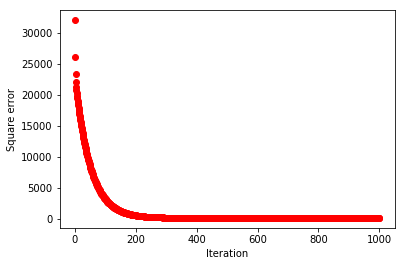

In [5]:
theta0 = np.random.rand(1+1) # 随机产生线性方程系数
Jtheta,Besttheta = updateTheta(theta0, x, y, 0.01, 1000) # 对cost function进行1000次的梯度下降迭代，求得每次cost以及最优参数
plt.plot(range(len(Jtheta)), Jtheta, 'ro')
plt.ylabel('Square error')
plt.xlabel('Iteration')